# Project 2: Line Strengths and Curve of Growth ("Marcel Minnaert")

Candidate number: ? and 15909

EN LITEN INTRO HER!

Imported modules needed to solve the following problems

In [6]:
%%javascript  # Allow equation numbers
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


<IPython.core.display.Javascript object>

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.special import wofz
from IPython.display import set_matplotlib_formats
from cycler import cycler

import warnings
warnings.filterwarnings("ignore")

set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)

# Exercise 1: The Planck Law and radiation through an isothermal layer


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Plot the Planck function $B_\lambda$ for 100 $< \lambda <$ 2000 nm for a range of temperatures (5000 to 8000 K). Use a log scale for both the x and y axes. Explain the slopes of the righthand part.

Answer:
    
</div>    

The Planck function specifies the radiation intensity emitted by a gas or a body in thermodynamic equilibrium as
 
\begin{equation} 
   B_\lambda(T) = \frac{2hc^2}{\lambda^5} 
                  \frac{1}{\mathrm{e}^{hc/\lambda kT}-1},
  \label{eq:1.1}
\end{equation}

where $T$ and $\lambda$ is temperature and wavelength respectively. We want to plot \eqref{eq:1.1} for 100 < $\lambda$ < 2000 nm for a range of temperatures (5000 to 8000 K), in order to observe how the intensities corresponding to these different given temperatures develop at different wavelengths. This can be done by using a BlackBody model from astropy and importing a variation of imports from astropy, making it easier when converting between units.

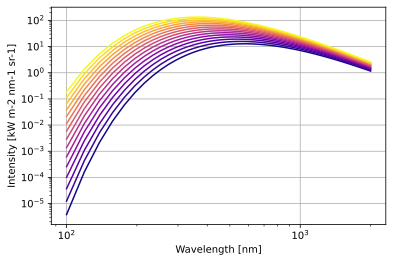

In [8]:
from astropy import units
from astropy import constants
from astropy.visualization import quantity_support
from astropy.modeling.models import BlackBody
from astropy.modeling.blackbody import blackbody_lambda
from astropy.modeling.blackbody import blackbody_nu
quantity_support()

temp = units.Quantity([5000,8000], unit='K')
bb = BlackBody(temp)

# Gives Plack function as a func of lambda(wavelength):
i_units = 'W m-2 nm-1 sr-1'
bb_lambda = BlackBody(temp, scale=1. * units.Unit(i_units))

wave = np.linspace(100,2000,100) * units.nm
temp = np.linspace(5000,8000,15) * units.K
bb_lambda(wave[:, np.newaxis])

radiation = BlackBody(temp, scale=1.*units.Unit(i_units))(wave[:,np.newaxis])

fig, ax = plt.subplots()
custom_cycler = cycler('color', cm.plasma(np.linspace(0,1,len(temp))))
ax.set_prop_cycle(custom_cycler)
ax.plot(wave, radiation.to('kW m-2 nm-1 sr-1'))
plt.ylabel("Intensity [kW m-2 nm-1 sr-1]")
plt.xlabel("Wavelength [nm]") #$\\lambda$
plt.xscale("log")
plt.yscale("log")
plt.grid()

In the plot presented above, we see the Plack function, $B_{\lambda}$ for 100 < $\lambda$ < 2000 nm, as a function of wavelength $\lambda$ (5000 to 8000 K). We observe that the slopes for the different intensities corresponding to 15 different tempertures will approach eachother on the right hand part. The reason for this is that Planck's law at long wavelengths becomes the Rayleigh-Jeans law,

\begin{equation*}
B_{\lambda}(T) \approx \frac{2 c}{\lambda^4} k_B T, \\
\end{equation*}


which means that,

\begin{equation*}
B_{\lambda} \ \propto \ \frac{1}{\lambda^4}. \\
\end{equation*}


And since we have a log plot, looking at log(1/$\lambda^4$), we can obatin

\begin{equation*}
\text{log} \Big( \frac{1}{\lambda^4} \Big) = \text{log}(1) - \text{log}(\lambda^4) = -4 \text{log}(\lambda),\\
\end{equation*}


which indicates that the intensitites decreases linearly like -4$\lambda$ in this plot.


<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Use equation (5) to calculate the radiation through an isothermal layer. Make plots of $I_\lambda$ for the different values of $I_\lambda(0)$, using the following values:

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```

* How does $I_\lambda$ depend on $\tau$ for $\tau \ll 1$ when $I_\lambda(0) =0$ (hint: use a log scale in the x and y axes to study the behavior at small $\tau$)?  And when $I_\lambda(0) > B_\lambda$? Such a layer with $\tau \ll 1$ is called "optically thin", why? Would "radiatively thin" be a better name?
    
* A layer is called "optically thick" when it has $\tau \gg 1$. Why? The emergent intensity becomes independent of $\tau$ for large $\tau$. Can you explain why this is so in physical terms?
 

 
Answer:
    
</div>  

Next, we want to calculate the radiation through an isothermal layer, by use of the equation


\begin{equation}
   I_\lambda = I_\lambda(0) \mathrm{e}^{-\tau} 
        + B_\lambda \, \left( 1 - \mathrm{e}^{-\tau} \right).
    \label{eq:1.2}
\end{equation}

This we want to do in order to create plots of $I_{\lambda}$ for the different values of $I_\lambda(0)$, so that we can investigate how the intensities evolves when the optical path increases. 

When performing the calculations, we will be using some chosen values presented below,

``` python
b_lambda = 2
tau = numpy.logspace(-2, 1, 100)
i0 = numpy.arange(5)
```


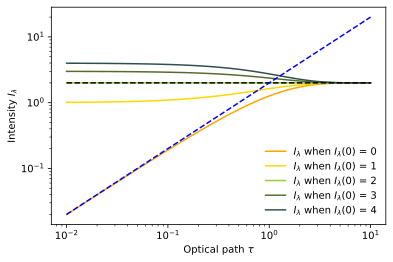

In [9]:
b_lambda = 2
tau = np.logspace(-2, 1, 100)
i0 = np.arange(5)

def I_lambda(tau,b_lambda,I0):
    return_I = (I0 * np.exp(-tau)) + b_lambda*(1-np.exp(-tau))
    return return_I
 
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[0]), "orange", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 0")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[1]), "gold", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 1")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[2]), "yellowgreen", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 2")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[3]), "darkolivegreen", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 3")
plt.plot(tau,I_lambda(tau,b_lambda,I0=i0[4]), "darkslategrey", label="$I_{\lambda}$ when $I_{\lambda}(0)$ = 4")
plt.ylabel("Intensity $I_{\\lambda}$")
plt.xlabel("Optical path $\\tau$")
plt.plot(tau, np.ones(100)*b_lambda, "k--")
plt.plot(tau, tau*b_lambda, "b--")
plt.legend()
plt.loglog()
plt.show()


The plot above presents the intensity as a function of optical path. 
When the optical path is small, the intensity corresponding to when $I(0)=0$ goes as $B_{\lambda} \tau$, which is represented by the blue dashed line. When looking at Eq \eqref{eq:1.2} for $\tau \ll 1$ when $I(0)=0$ we get, 

\begin{equation}
I_{\lambda} = B_{\lambda}(1-e^{- \tau}), \nonumber
\end{equation}

and then we Taylor expand $e^{- \tau}$ at $\tau = 0$ and get

\begin{equation}
(1-e^{- \tau}) \approx e^0 - e^{- \tau} \tau = e^0 - \tau = 1 - \tau. \nonumber
\end{equation}

When inserting this back into the original expression for $I_{\lambda}$, we obtain

\begin{equation}
I_{\lambda} = B_{\lambda}(1 - (1 - \tau)) = B_{\lambda} \tau. \nonumber
\end{equation}


When $I(0)=2$ the intensity is constant at 2, and we can see the reason why by again looking at Eq \eqref{eq:1.2}, and observing that the expression becomes

\begin{equation}
I_{\lambda} = 2 e^{-\tau} + 2(1-e^{- \tau}) = 2, \nonumber
\end{equation}

when inserting $I(0)=2$ and $B_{\lambda} = 2$. 

Next, we look at when $I_\lambda(0) > B_\lambda$ and observe from the plot that for $\tau \ll 1$ the intensity will be greater than when $I_\lambda(0) \leq B_\lambda$. The top two dark green lines represents this situation.

A layer when $\tau \ll 1$ is called "optically thin", becuase the medium becomes very transparent. A photon can pass trough this medium witout absorbtion, and an example of such an optically thin medium can be glas or water as opposed to a wooden table, which is a layer called "optically thick". This is when $\tau \gg 1$, and photons can no longer travel trough without absorption. 

In the plot, we observe that after $\tau \approx 10^{-1}$ all the intensities approach eachother at $I_{\lambda} = 2$. The reason for this can also be found by looking at Eq \eqref{eq:1.2}. We see that the exponentials goes to zero when $\tau \gg 1$, and the expression becomes 

\begin{equation}
I_{\lambda} = B_{\lambda} = 2. \nonumber
\end{equation}

If we look at this in physical terms, it means that when $\tau$ becomes very large, the intensity becomes independent of $\tau$, and the medium becomes so opaque that all the light that is emmited on the other side of the medium, relative to the light source, is the light emmtied from the object itself.


# Exercise 2: Spectral lines from a solar reversing layer

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Compute and plot the emergent line profiles using a Schuster-Schwarzschild model, writing code for this purpose. Try changing the parameters (`temp_surface`, `temp_layer`, `a`, `tau0`) to see if you can obtain a saturated line profile (flat bottom). Which parameter(s) are more important in determining this?

Answer: Code below



</div>

The Schuster-Schwarzschild model, also known as the reversing-layer model, is a model that describes radiation which originate at an isothermal layer around the stellar surface. The wavelength lines is caused by atom in a bound-bound transition and the layer may be optically thin or thick based on the concentration of the atoms. The atoms that causes these types of lines have a temperature $T_{\textrm{layer}}$ and therefore contributes to the total emergent intesity. The equation of interest goes as following:

\begin{equation} 
  I_\lambda = B_\lambda(T_{\rm surface}) \mathrm{e}^{-\tau_\lambda} 
        + B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right).
    \label{eq:SS_transfer}
\end{equation}

where $B_{\lambda}$ is the Planck function contributed to the intensity in TE either on the surface or at the layer and $\tau_{\lambda}$ is the optical depth. But $\tau$ is dependent on the wavelength, so we need to compute this first by using the Voigt function. The Voigt function includes the broadening of wavelength due to for example Doppler shift or interaction between particles due to electric fields. An arbitrary value of the wavelength is chosen to be $\lambda = 300$ nm. We then develope the following code by allowing us to introduce radiation from a black body from the library package $\verb|astropy|$:

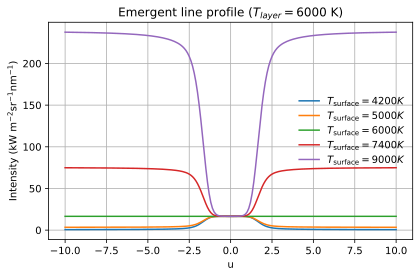

In [20]:
i_units = "kW m-2 sr-1 nm-1"      # practical SI units


def voigt(damping, u):
    """
    Calculates the Voigt function.
    """
    z = (u + 1j * damping)
    return wofz(z).real


def compute_profile(tau0, a, u, wavelength):
    wave = wavelength[np.newaxis, np.newaxis]
    tau = tau0[np.newaxis] * voigt(a, u[:, np.newaxis])
    tau = tau[..., np.newaxis]
    
    result = (blackbody_lambda(wave, temp_surface) * np.exp(-tau)) + \
            blackbody_lambda(wave, temp_layer) * (1-np.exp(-tau))
    
    return np.squeeze(result)


wave = units.Quantity(300, unit = "nm")
tau0 = np.array([10])
a = np.array([0.1])
u = np.linspace(-10, 10, 201)
temp_surf = np.array([4200, 5000, 6000, 7400, 9000]) * units.K
temp_layer = 6000 * units.K


plt.figure()
for t in temp_surf:
    temp_surface = t
    intensity = compute_profile(tau0, a, u, wave)
    plt.plot(u, intensity.to(i_units), label=r"$T_{\rm surface} = %i K$" % t.value)
plt.title(r"Emergent line profile ($T_{layer} = 6000$ K)")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
plt.grid()
plt.legend(loc=5)
plt.tight_layout()


After some trial and error by changing the parameters $T_{\rm surface}, T_{\rm layer}, a$ and $\tau_0$, we get a saturated line profile if the optical depth is greater than one. The surface temperature must be greater than the layer temperature for obtaining absorbation curves as seen from above. Notice that when $T_{\rm surface} = T_{\rm layer}$, then the intensity is constant at and around the respective wavelength. At this temperatures, there is no attunation meaning that $I_{\lambda} = I_{\lambda}(0)$ for all values of $u$ where $u$ is the dimensionless wavelength. The radiation are in a "perfect" balance between absorption and emission. The ratio between surface temperature and layer temperature determermines the case of absorption or emission spectra as we see from the plot.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Make a plot of line profiles with different $\tau_0$, using `tau0 = 10 ** numpy.linspace(-2, 2, 9)`. How do you explain the profile shapes for $\tau(0) \ll 1$? Why is there a low-intensity saturation limit for $\tau \gg 1$? Why do the line wings develop only for very large $\tau(0)$? Where do the wings end? For which values of $\tau(0)$ is the layer optically thin, respectively optically thick, at line center? And at $u=5$?

Answer:

</div>

We have defined the Coulumb disturbance parameter to an arbitrary value $a=0.1$ as it is common in stellar atmospheres. We then plot for increasing value of the optical depth $\tau_0 \in [10^{-2}, 10^{2}]$.

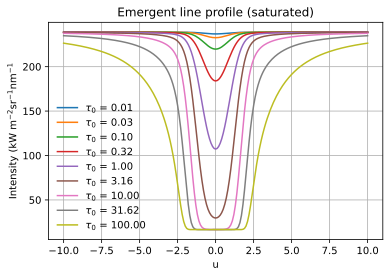

In [21]:
temp_surface = 9000 * units.K
temp_layer = 6000 * units.K
tau0 = np.logspace(-2, 2, 9)

for t0 in tau0:
    intensity = compute_profile(t0, a, u, wave)
    plt.plot(u, intensity.to(i_units), label=r"$\tau_0$ = %.2f" % t0)
plt.title("Emergent line profile (saturated)")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$")
plt.legend()
plt.grid()

From the plot above, we notice that when the optical depth is low ($\tau(0) \ll 1$) the profiles seems to be relatively little affected which means that the radiation from that wavelength is almost not absorbed or scattered at all. As we see, this is not the case when $\tau(0)$ increases. The intensity decreases for that specific wavelength as the optical depth is greater. This makes sense as the radiation with this wavelength needs to travel through a higher concentration of atoms. The wavelength that gets dimmer is related to bound-bound transition between two discrete energy levels. We also notice that the intensity converges to a certain value when $\tau(0) \gg 1$. If we look at equation (1  $\ref{eq:SS_transfer}$), we see the right-hand side is totally determined by $B_{\lambda}(T_{\rm surface})$ as $B_\lambda(T_{\rm layer}) \, \left( 1 - \mathrm{e}^{-\tau_\lambda} \right) \to 0$. The intensity contribution from the layer is neglictable if the optical length is much greater than one.

The plot shows how the line wings develops for only large values of $\tau(0)$. This is a result due to the Voigt function. As mentioned earlier, the Voigt function describes the broadening of a line as caused by atomic thermal motion or electric field interactions. It is a convolution between both a Gaussian distribution and a Lorentzian distribution. The Gaussian distribution dominates close to the line center (small or no Doppler shift) while else the Lorentzian distribution dominates. Since the optical depth is so large, the radiation originated in the layer will interact several times with its surroundings before it reaches the observer. In theory, the wings will never end as the radiation may in principle interact with other particles for ever. This is though highly unlikely.

The layer is optically thin if the intensity is transparent to radiation. The layer is optically thick if the intensity is fully depleted. From the plot with the chosen wavelength of $\lambda = 300$ nm, it may seem that the layer is is optically thin for $\tau(0) < 0.01$ and optically thick at $\tau(0) \approx 3.2$ at the line center. For $u=5$ and after some testing in the value of $\tau(0)$ it seems that the layer is optically thin at $\tau(0) \approx 20$ and optically thick at $\tau(0) \approx 25 \cdot 10^3$.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Now study the dependence of these line profiles on wavelength by repeating the above for $\lambda=$ 200 nm (ultraviolet) and $\lambda=$ 1000 nm (near infrared). What sets the top value $I_{\rm cont}$ and the limit value reached at line center by $I(0)$? Check these values by computing them directly. What happens to these values at other wavelengths?  

Answer:
    
</div>

We will now repeat the same procedure as above but with other values of $\lambda$. The first case will consist of $\lambda = 200$ and then for $\lambda = 1000$ as it will be in the ultraviolet and infrared domain respectively. The parameters is set to $a=0.1$ and and $\tau(0) = 1$.

In [22]:
wave_uv = units.Quantity(200, unit = "nm")       # ultraviolet
wave_ir = units.Quantity(1000, unit = "nm")      # infrared

tau0 = np.array([1])
a = np.array([0.1])
u = np.linspace(-10, 10, 201)

temp_surf = 9000 * units.K
temp_layer = 6000 * units.K

intensity_uv = compute_profile(tau0, a, u, wave_uv)
intensity_ir = compute_profile(tau0, a, u, wave_ir)

intensity_uv_0 = compute_profile(tau0, a, np.array([0]), wave_uv)
intensity_ir_0 = compute_profile(tau0, a, np.array([0]), wave_ir)

print("Continuum value for UV:          %.1f %s" % (intensity_uv[0].to(i_units).value, i_units))
print("Continuum value for IR:           %.1f %s" % (intensity_ir[0].to(i_units).value, i_units))
print("Limit value at I(0) for UV:       %.1f %s" % (intensity_uv_0.to(i_units).value, i_units))
print("Limit value at I(0) for IR:       %.1f %s" % (intensity_ir_0.to(i_units).value, i_units))

Continuum value for UV:          125.7 kW m-2 sr-1 nm-1
Continuum value for IR:           30.2 kW m-2 sr-1 nm-1
Limit value at I(0) for UV:       52.7 kW m-2 sr-1 nm-1
Limit value at I(0) for IR:       19.4 kW m-2 sr-1 nm-1


We notice how the profiles differs for ultra violet and infrared wavelengths. The continuum intensity as well as the intensity at $I(0)$ is greater for the ultra violet wavelength as seen from the printouts. The lower frequency beams are more energetic and in this case its intensity is greater. The absorption of the high  energy lines are much greater as we observe from the difference in continuum and $I(0)$ for both wavelengths. This may be as the high energic lines interacts more frequent in the stellar atmosphere. 

So what happens to other wavelengths between 200 nm and 1000 nm? We will illustrate that by computing the continuum intensity and $I(0)$ for arbitrary wavelengths that lies in this interval:

In [23]:
waves = np.linspace(200, 1000, 20) * units.nm
tau0 = np.array([10])
a = np.array([0.1])


for w in waves:
    intensity = compute_profile(tau0, a, u, w)
    print("Continuum value for lambda = %i nm:          %.1f %s" % (w.value, intensity[0].to(i_units).value, i_units))
    
for w in waves:
    intensity_0 = compute_profile(tau0, a, np.array([0]), w)
    print("Limit value at I(0) for lambda = %i nm:      %.1f %s" % (w.value, intensity_0.to(i_units).value, i_units)) 


Continuum value for lambda = 200 nm:          125.0 kW m-2 sr-1 nm-1
Continuum value for lambda = 242 nm:          193.4 kW m-2 sr-1 nm-1
Continuum value for lambda = 284 nm:          231.3 kW m-2 sr-1 nm-1
Continuum value for lambda = 326 nm:          240.5 kW m-2 sr-1 nm-1
Continuum value for lambda = 368 nm:          230.8 kW m-2 sr-1 nm-1
Continuum value for lambda = 410 nm:          211.3 kW m-2 sr-1 nm-1
Continuum value for lambda = 452 nm:          188.0 kW m-2 sr-1 nm-1
Continuum value for lambda = 494 nm:          164.5 kW m-2 sr-1 nm-1
Continuum value for lambda = 536 nm:          142.6 kW m-2 sr-1 nm-1
Continuum value for lambda = 578 nm:          123.0 kW m-2 sr-1 nm-1
Continuum value for lambda = 621 nm:          105.9 kW m-2 sr-1 nm-1
Continuum value for lambda = 663 nm:          91.2 kW m-2 sr-1 nm-1
Continuum value for lambda = 705 nm:          78.6 kW m-2 sr-1 nm-1
Continuum value for lambda = 747 nm:          67.9 kW m-2 sr-1 nm-1
Continuum value for lambda = 789 nm: 

The computed values above give some interesting results. The greatest continuum intensity occurs at $\lambda \approx 326$ nm while the greatest $I(0)$ occurs at $\lambda \approx 470$ nm. This is true for $\tau_0 \gg 1$. The intensity and absorption of radioation is not linearly dependent with wavelength for constant surface and layer temperatures. 

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">

* Make a figure with plots for the above: line profiles for several values of $\tau_0$, and the three different wavelengths (200, 500, and 1000 nm). However, normalise each line profile by its continuum intensity: `intensity /= intensity[0]` (observed spectra are usually normalised this way because absolute calibrations are often missing). Explain the wavelength dependencies in this plot.

Answer:

</div>

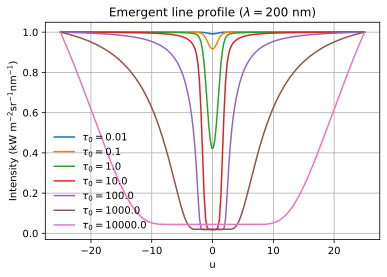

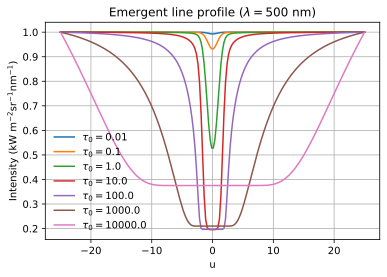

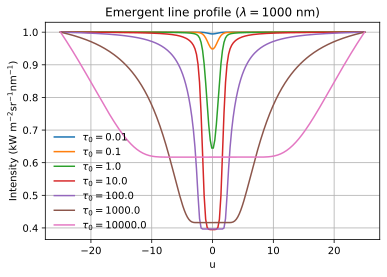

In [24]:
tau0 = np.logspace(-2,4,7)
u = np.linspace(-25, 25, 200)
waves = np.array([200, 500, 1000]) * units.nm


for i in range(len(waves)):
    plt.figure(i)
    plt.title(r"Emergent line profile ($\lambda=%i$ nm)" % waves.value[i])
    plt.grid()
    plt.xlabel("u")
    plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
    
    for j in range(len(tau0)):
        intensity = compute_profile(tau0[j], a, u, waves[i])
        plt.plot(u, intensity/intensity[0], label=r"$\tau_0=%s$" % tau0[j])
    plt.legend()


These three plots show the results of the normalised reversing model by different values of $\lambda$. Each wavelength is then plotted for increasing value of $\tau(0)$. We notice how the profile varies a lot for the optical depth $\tau(0) \gg 1$ and barely affected for $\tau(0) \ll 1$. The conlusion is that the dependencies in the wavelength is only relevant in the optical thick region. This makes sense as if the gas is optical thin, the wavelengths is transparent to the medium and is therefore very little affected.

# Exercise 3: The curve of growth

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">
    
* Using the code from Exercise 2, compute and plot a curve of growth by plotting $W_\lambda$ against $\tau_0$ on a log-log plot. Explain what happens in the three different parts.
    

* The first part has slope 1:1, the third part has slope 1:2 in this log-log plot.  Why?

Answer:


</div>

The strengt of a spectral line is expressed as the equivalent width. We want to plot a curve of growth by plotting the equivalent width $W_{\lambda}$ against $\tau_0$ on a log-log plot. This we want to do so that we can investigate what happens with the width as $\tau_0$ increases. This is done by defining $W_{\lambda}$,

\begin{equation}
W_{\lambda} \equiv \int 1 - \frac{I(\lambda)}{I_{\text{cont}}} d \lambda,
\end{equation}

using the $\verb|compute|$_$\verb|profile()|$ function defined in exercise 2 and a blackbody function importet from astropy to calculate the $I(\lambda)$ and $I_{\text{cont}}$ respectively, and using the $\verb|numpy.trapz|$ function to solve the integral.

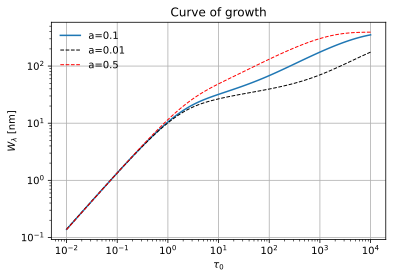

In [25]:
tau0 = np.logspace(-2,4,100)
wavelength = np.array([200])*units.nm  #bølgelengden til spektrallinjna vi ønsker
waves = np.linspace(100,500,len(u))*units.nm

a1 = 0.01
a2 = 0.5
intensity_new = compute_profile(tau0, a, u, wavelength).to(i_units)
intensity_new1 = compute_profile(tau0, a1, u, wavelength).to(i_units)
intensity_new2 = compute_profile(tau0, a2, u, wavelength).to(i_units)
intensity_cont = blackbody_lambda(wavelength, temp_surface).to(i_units)

integrate = 1 - (intensity_new/intensity_cont)
integrate1 = 1 - (intensity_new1/intensity_cont)
integrate2 = 1 - (intensity_new2/intensity_cont)


W_lambda = np.trapz(integrate,waves,axis=0)
W_lambda1 = np.trapz(integrate1,waves,axis=0)
W_lambda2 = np.trapz(integrate2,waves,axis=0)

plt.figure()
plt.loglog(tau0, W_lambda, label="a=%s" % a[0]);
plt.loglog(tau0, W_lambda1, "--", color="black", lw=1, label="a=%s" % a1);
plt.loglog(tau0, W_lambda2, "--", color="red", lw=1, label="a=%s" % a2);
plt.title("Curve of growth")
plt.grid(); plt.legend()
plt.xlabel("$\\tau_0$")
plt.ylabel("$W_{\\lambda}$ [nm]");


In the plot above, we notice that the equivalent width has three different phases as a function of $\tau_0$. The first slope goes like a logarithmic linearly curve all the way untill $\tau_0 \approx 1$. This is the region before saturation begins. The intensity $I(0)$ is still decreasing while the width of the intensity curve is approximately the same as seen from the saturated emergent line profile plot in exercise 2. When $\tau_0 \geq 1$, the logarithmic gradient of the slope is slowly decreasing. This is the region where saturation begins and the intensity plot gets wider while $I(0)$ is constant with respect to $\tau_0$. In the last part after the transition between non-saturation and saturation, the curve goes almost linearly but the gradient of the curve seems to slowly increase.

We remember that the reversal model is described using the Voigt profile, meaning that the intensity curves is a convolution between a Gauss profile and a Lorentz profile. The wings from a Gaussian profile falls off much faster than the wings of the Lorentz profile. At $\tau_0 = 1$, the Gaussian profile seems to be gradually fading away compared to the Lorentz profile. The conclusion is that the Voight profile convolution is direct result of why the curve has a 1:1 part and 1:2 part.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">


* Which parameter controls the location of the onset of the third part? Give a rough estimate of its value for solar iron lines through comparison with the given figure from Wright (1948).

Answer:
    
</div>

The Coulumb disturbance affects the onset of the third part as we see in the curve of growth plot above. The third part begins at lower $\tau_0$ for higher values of $a$. It is clear that the Coulumb disturbance will affect the width of the itensity plot. This makes sense as particles in the stellar atmosphere interacts more frequent as the conentration of charged particles is higher and will therefore scatter the .

It may look like that the third part begins at $\tau_0 \approx 20$ for the case when $a=0.1$ in our plot. It looks to begin at an earlier stage from Wrights figure at $\tau_0 \approx 3$ so there is a difference. We must remember that we are introducing a model that is very limited to the reality. Nevertheless, we observe that the shape of the model curve and the observational curve seems to fit each other quite wel.

<div style="background-color:#e6ffe6; padding:10px; border-style:
solid;; border-color:#00e600; border-width:1px">


* Which parameter should you increase to produce emission lines instead of absorption lines? Change it accordingly and modify the code to produce emission profiles and an emission-line curve of growth. (To avoid taking the log of negative $W_\lambda$, plot the absolute value of $W_\lambda$.)

Answer:
    
</div>

Up until this point, we have produced absorbsion profiles. If we instead want to produce emission lines, the values of the layer and surface temperature needs to be changed, when the intensity is changing as the temperature changes. We can test this by adjusting the code and look at the resulting plot.

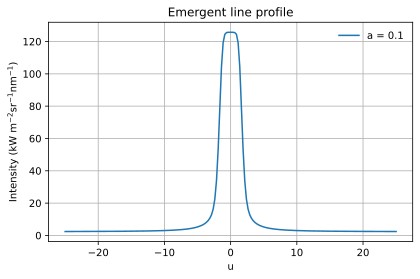

In [17]:
tau0 = np.array([10])
wave = np.array([200])*units.nm

temp_surface = 6000 * units.K
temp_layer = 9000 * units.K

intensity = compute_profile(tau0, a, u, wave)

plt.figure()
plt.plot(u, intensity.to(i_units))
plt.title("Emergent line profile")
plt.xlabel("u")
plt.ylabel("Intensity (kW $\mathrm{m^{-2} sr^{-1} nm^{-1}}$)")
plt.grid()
legend_elements = ['a = %s' % value for value in a]
plt.legend(legend_elements)
plt.tight_layout()


We notice, in the plot presented above, that switching the values of the layer and surface temperature results in an emission line. The outcome of the spectral line depends on which of these two temperature values are the greatest. When the surface temperature is greater than the layer tempearture, some atoms in the layer will absorb photons with a certain wavelength, resulting in absorbtion lines.

When the layer temperature is greater than the surface temeprature, we get an emission line. The reason for this is that the atoms in the layer at high temperatures, has exited electrons which will spontanously decay, resulting in emission of photons with a certain wavelength, so that we observe emission lines.



To avoid taking the log of negative $W_{\lambda}$, we also want to plot the absolute value of $W_{\lambda}$, so that we can compare the resulting plot with the previously presented plot of the curve growth. By making some small adjustments to the code calculating $W_{\lambda}$, we are able to create a new plot.

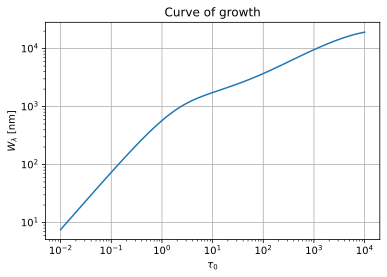

In [18]:
tau0 = 10** np.linspace(-2,4,100)
wave = np.linspace(100,500,201)*units.nm

intensity_new2 = compute_profile(tau0, a, u, wavelength).to(i_units)
intensity_cont = blackbody_lambda(wavelength, temp_surface).to(i_units)

integrate = 1 - (intensity_new2/intensity_cont)
W_lambda = np.abs(np.trapz(integrate,waves,axis=0))

plt.figure()
plt.loglog(tau0, W_lambda,"-");
plt.title("Curve of growth")
plt.grid()
plt.xlabel("$\\tau_0$")
plt.ylabel("$W_{\\lambda}$ [nm]");

When comparing this plot with the previously presented plot of the curve growth, we observe that they are alike. HVORFOR? like mye abs som emisjon? Kan vi si noe mer om hvorfor?